# **1. Import Library**

In [760]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import lightgbm as lgb


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.feature_selection import chi2

# **2. Data Understanding**

### 2.1 Data Loading

In [761]:
file_path = "cat_disease.csv"
disease_df = pd.read_csv(file_path)
disease_df = disease_df.drop(columns=['Animal_Type'])
disease_df.head()

,Breed,Age,Gender,Weight,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Duration,Appetite_Loss,...,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Body_Temperature,Heart_Rate,Disease_Prediction
0,Labrador,4,Male,25.0,Fever,Lethargy,Appetite Loss,Vomiting,3 days,Yes,...,No,No,No,No,No,No,No,39.5°C,120,Parvovirus
1,Siamese,2,Female,4.5,Coughing,Sneezing,Eye Discharge,Nasal Discharge,1 week,No,...,No,Yes,No,No,No,Yes,Yes,38.9°C,150,Upper Respiratory Infection
2,Holstein,3,Female,600.0,Fever,Nasal Discharge,Labored Breathing,Coughing,5 days,Yes,...,No,Yes,Yes,No,No,Yes,No,40.1°C,90,Foot and Mouth Disease
3,Beagle,1,Male,10.0,Diarrhea,Vomiting,Lethargy,Appetite Loss,2 days,Yes,...,Yes,No,No,No,No,No,No,39.2°C,130,Gastroenteritis
4,Persian,5,Male,3.8,Lethargy,Appetite Loss,Skin Lesions,No,2 weeks,Yes,...,No,No,No,No,Yes,No,No,38.7°C,160,Fungal Infection


# **3. Exploratory Data Analysis (EDA)**

In [762]:
#Meninjau jumlah baris dan kolom dataset
jumlah_baris, jumlah_kolom = disease_df.shape

print(f"Jumlah baris (rows): {jumlah_baris}")
print(f"Jumlah kolom (columns): {jumlah_kolom}")

Jumlah baris (rows): 431
Jumlah kolom (columns): 21


In [763]:
#Menampilkan informasi dataset
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Breed               431 non-null    object 
 1   Age                 431 non-null    int64  
 2   Gender              431 non-null    object 
 3   Weight              431 non-null    float64
 4   Symptom_1           431 non-null    object 
 5   Symptom_2           431 non-null    object 
 6   Symptom_3           431 non-null    object 
 7   Symptom_4           431 non-null    object 
 8   Duration            431 non-null    object 
 9   Appetite_Loss       431 non-null    object 
 10  Vomiting            431 non-null    object 
 11  Diarrhea            431 non-null    object 
 12  Coughing            431 non-null    object 
 13  Labored_Breathing   431 non-null    object 
 14  Lameness            431 non-null    object 
 15  Skin_Lesions        431 non-null    object 
 16  Nasal_Di

In [764]:
#Memeriksa Missing Values pada dataset
disease_df.isnull().sum()

,0
Breed,0
Age,0
Gender,0
Weight,0
Symptom_1,0
Symptom_2,0
Symptom_3,0
Symptom_4,0
Duration,0
Appetite_Loss,0


In [765]:
## ringkasan statistik dataset
describ = disease_df.describe()
describ

,Age,Weight,Heart_Rate
count,431.000000,431.000000,431.000000
mean,5.044084,214.441067,105.582367
std,2.553685,259.594305,27.892936
min,1.000000,1.000000,70.000000
25%,3.000000,8.000000,80.000000
50%,5.000000,80.000000,92.000000
75%,6.000000,500.000000,130.000000
max,16.000000,850.000000,165.000000


In [766]:
#menampilkan jumlah label kolom Disease
print(disease_df['Disease_Prediction'].value_counts())

Disease_Prediction
Bovine Tuberculosis                15
Bovine Respiratory Disease         14
Equine Influenza                   13
Canine Parvovirus                  12
Caprine Arthritis Encephalitis     12
                                   ..
Goat Pox                            1
Porcine Epidemic Diarrhea Virus     1
Canine Infectious Hepatitis         1
Feline Panleukopenia Virus          1
Porcine Circovirus Disease          1
Name: count, Length: 139, dtype: int64


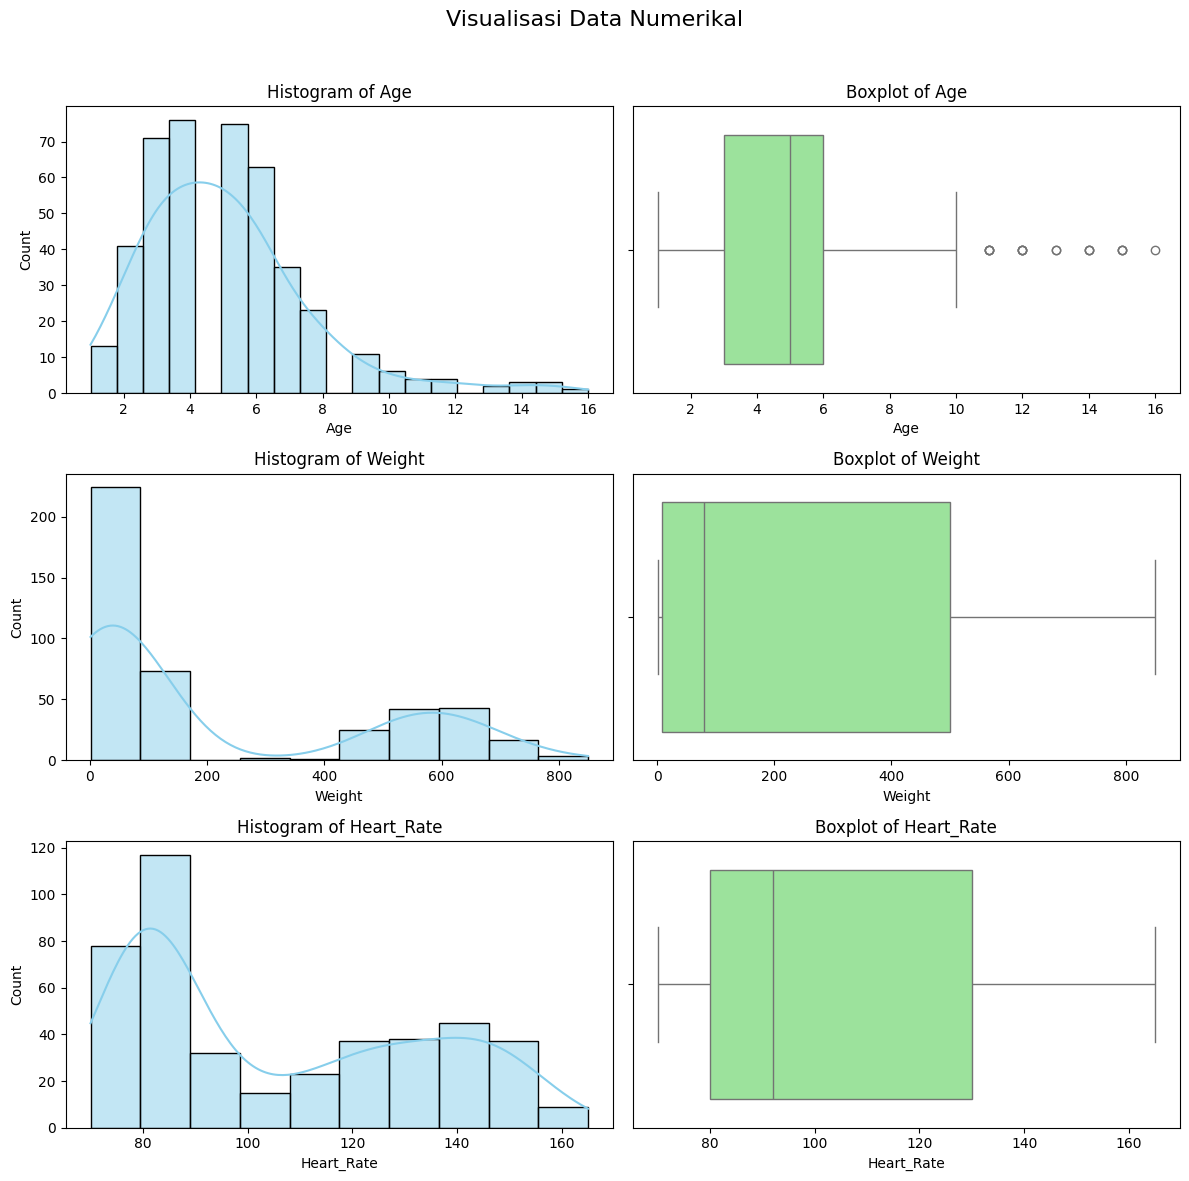

In [767]:
#Visualisasi data numerik menggunakan histogram dan boxplot
numerical_cols = ['Age', 'Weight', 'Heart_Rate']

fig_num, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 12))
fig_num.suptitle("Visualisasi Data Numerikal", fontsize=16)

for i, col in enumerate(numerical_cols):
    # Histogram
    sns.histplot(disease_df[col], kde=True, ax=axes[i][0], color='skyblue')
    axes[i][0].set_title(f'Histogram of {col}')

    # Boxplot
    sns.boxplot(x=disease_df[col], ax=axes[i][1], color='lightgreen')
    axes[i][1].set_title(f'Boxplot of {col}')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<ipython-input-768-aab6136bb49a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=disease_df[disease_df[col].isin(top_categories)],
<ipython-input-768-aab6136bb49a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=disease_df[disease_df[col].isin(top_categories)],
<ipython-input-768-aab6136bb49a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=disease_df[disease_df[col].isin(top_categories)],
<ipython-input-768-aab6136bb49a>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be remov

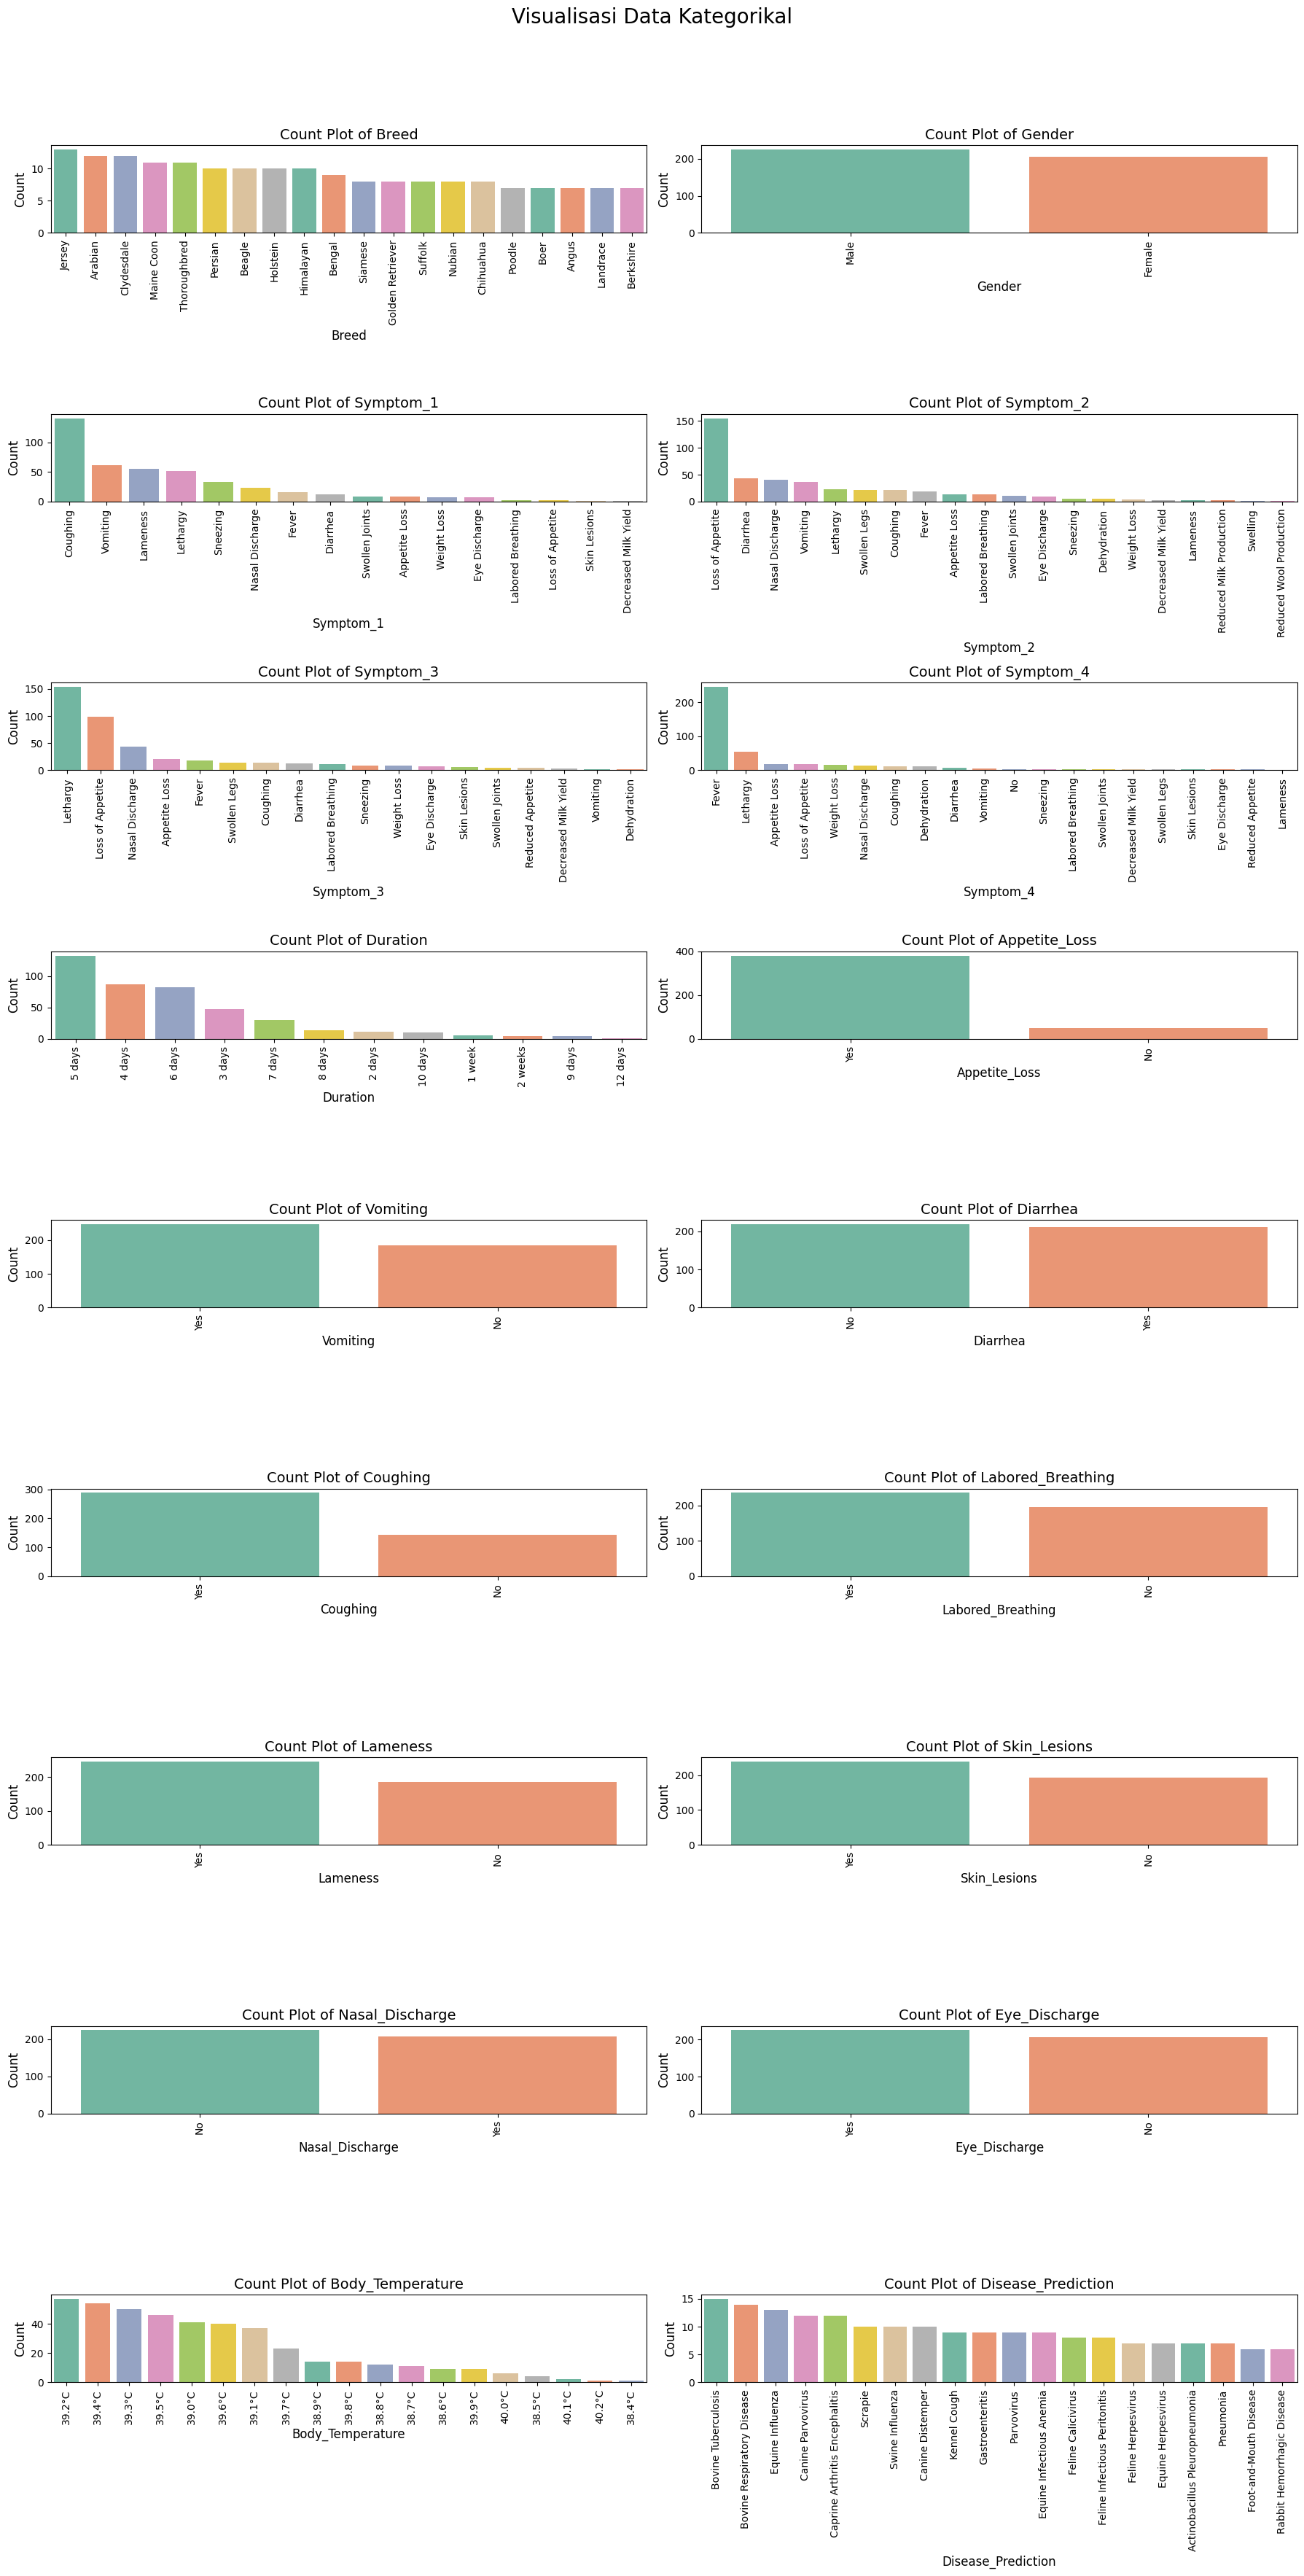

In [768]:
import matplotlib.pyplot as plt
import seaborn as sns

# Pilih kolom kategorikal
categorical_cols = disease_df.select_dtypes(include='object').columns.tolist()

# Atur ukuran subplot dinamis
ncols = 2
nrows = (len(categorical_cols) + 1) // ncols
fig_cat, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(18, nrows * 4))
fig_cat.suptitle("Visualisasi Data Kategorikal", fontsize=20)

# Flatten axes supaya bisa diakses seperti list
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    # Ambil sumbu saat ini
    ax = axes[i]

    # Ambil top 20 kategori (opsional, bisa disesuaikan)
    top_categories = disease_df[col].value_counts().nlargest(20).index

    # Plot barplot untuk top kategori
    sns.countplot(data=disease_df[disease_df[col].isin(top_categories)],
                  x=col, order=top_categories, ax=ax, palette="Set2")

    ax.set_title(f'Count Plot of {col}', fontsize=14)
    ax.tick_params(axis='x', rotation=90, labelsize=10)
    ax.set_xlabel(col, fontsize=12)
    ax.set_ylabel("Count", fontsize=12)

# Hilangkan axes kosong jika jumlah kolom ganjil
for j in range(i + 1, len(axes)):
    fig_cat.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


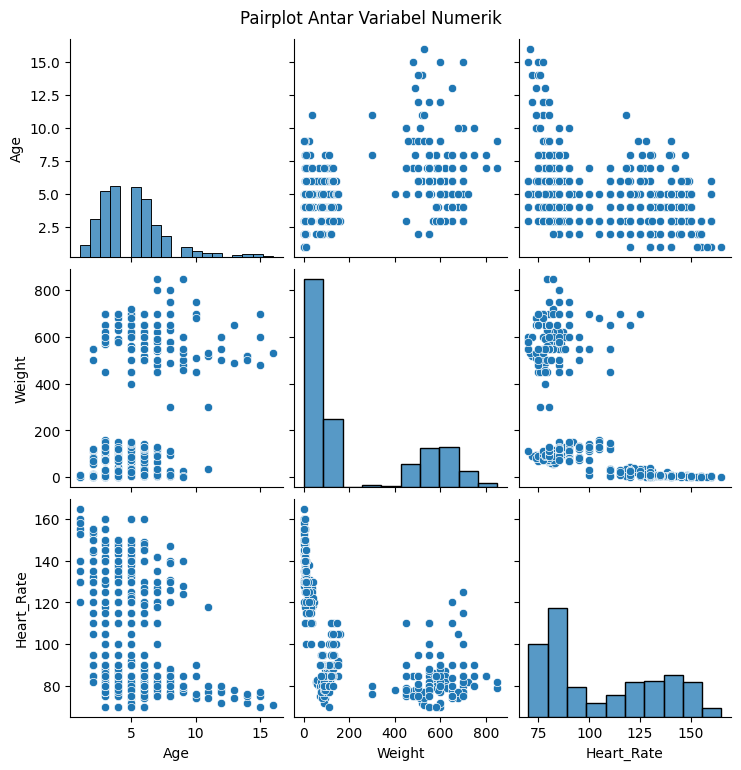

In [769]:
# Pairplot untuk hubungan antar variabel numerikal
sns.pairplot(disease_df.select_dtypes(include=[np.number]))
plt.suptitle("Pairplot Antar Variabel Numerik", y=1.02)
plt.show()

## **4. Data Preparation**

In [770]:
pd.set_option('future.no_silent_downcasting', True)

# Gender Mapping
gender_mapping = {
    'Male': 0,
    'Female': 1
}
disease_df['Gender'] = disease_df['Gender'].replace(gender_mapping).infer_objects(copy=False)

# Yes No Mapping
yes_no_mapping = {
    'No': 0,
    'Yes': 1
}
disease_df['Appetite_Loss'] = disease_df['Appetite_Loss'].replace(yes_no_mapping).infer_objects(copy=False)
disease_df['Vomiting'] = disease_df['Vomiting'].replace(yes_no_mapping).infer_objects(copy=False)
disease_df['Diarrhea'] = disease_df['Diarrhea'].replace(yes_no_mapping).infer_objects(copy=False)
disease_df['Coughing'] = disease_df['Coughing'].replace(yes_no_mapping).infer_objects(copy=False)
disease_df['Labored_Breathing'] = disease_df['Labored_Breathing'].replace(yes_no_mapping).infer_objects(copy=False)
disease_df['Lameness'] = disease_df['Lameness'].replace(yes_no_mapping).infer_objects(copy=False)
disease_df['Skin_Lesions'] = disease_df['Skin_Lesions'].replace(yes_no_mapping).infer_objects(copy=False)
disease_df['Nasal_Discharge'] = disease_df['Nasal_Discharge'].replace(yes_no_mapping).infer_objects(copy=False)
disease_df['Eye_Discharge'] = disease_df['Eye_Discharge'].replace(yes_no_mapping).infer_objects(copy=False)

In [771]:
label_encoders = {}

# List kolom yang perlu diencode
categorical_cols = ['Breed', 'Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4',
                    'Duration', 'Body_Temperature', 'Disease_Prediction']

# Encode setiap kolom kategorikal ke numerik
for col in categorical_cols:
    le = LabelEncoder()
    disease_df[col] = le.fit_transform(disease_df[col])
    label_encoders[col] = le  # Simpan encoder untuk setiap kolom

In [772]:
disease_df.head()

,Breed,Age,Gender,Weight,Symptom_1,Symptom_2,Symptom_3,Symptom_4,Duration,Appetite_Loss,...,Diarrhea,Coughing,Labored_Breathing,Lameness,Skin_Lesions,Nasal_Discharge,Eye_Discharge,Body_Temperature,Heart_Rate,Disease_Prediction
0,63,4,0,25.0,5,9,0,21,5,1,...,0,0,0,0,0,0,0,11,120,109
1,101,2,1,4.5,1,14,5,11,0,0,...,0,1,0,0,0,1,1,5,150,136
2,57,3,1,600.0,5,11,7,1,7,1,...,0,1,1,0,0,1,0,17,90,86
3,12,1,0,10.0,3,18,8,0,3,1,...,1,0,0,0,0,0,0,8,130,90
4,81,5,0,3.8,8,0,12,12,4,1,...,0,0,0,0,1,0,0,3,160,89


In [773]:
disease_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Breed               431 non-null    int64  
 1   Age                 431 non-null    int64  
 2   Gender              431 non-null    int64  
 3   Weight              431 non-null    float64
 4   Symptom_1           431 non-null    int64  
 5   Symptom_2           431 non-null    int64  
 6   Symptom_3           431 non-null    int64  
 7   Symptom_4           431 non-null    int64  
 8   Duration            431 non-null    int64  
 9   Appetite_Loss       431 non-null    int64  
 10  Vomiting            431 non-null    int64  
 11  Diarrhea            431 non-null    int64  
 12  Coughing            431 non-null    int64  
 13  Labored_Breathing   431 non-null    int64  
 14  Lameness            431 non-null    int64  
 15  Skin_Lesions        431 non-null    int64  
 16  Nasal_Di

In [774]:
print(disease_df['Disease_Prediction'].value_counts())

Disease_Prediction
21     15
18     14
55     13
31     12
33     12
       ..
94      1
114     1
28      1
79      1
112     1
Name: count, Length: 139, dtype: int64


In [775]:
label_counts = disease_df['Disease_Prediction'].value_counts()
valid_labels = label_counts[label_counts >= 9].index

filtered_df = disease_df[disease_df['Disease_Prediction'].isin(valid_labels)]

X = filtered_df.drop(columns=['Disease_Prediction'])
y = filtered_df['Disease_Prediction']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## **5. Modelling & Evaluation**

### 5.1 Latih Model dengan Random Forest

In [776]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

model = RandomForestClassifier(n_estimators=50, random_state=42, max_depth=15)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=15, n_estimators=50, random_state=42)

In [777]:
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay
# Evaluasi
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

rf_train_acc = accuracy_score(y_train, y_train_pred)
rf_test_acc = accuracy_score(y_test, y_test_pred)
rf_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
rf_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"Random Forest - Training Accuracy: {rf_train_acc:.2%}, F1-Score: {rf_train_f1:.2%}")
print(f"Random Forest - Testing Accuracy: {rf_test_acc:.2%}, F1-Score: {rf_test_f1:.2%}")

Random Forest - Training Accuracy: 100.00%, F1-Score: 100.00%
Random Forest - Testing Accuracy: 70.37%, F1-Score: 69.14%


### 5.2 Latih Model dengan XG Boost

In [778]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# 1. Label Encoding (jika target tidak mulai dari 0)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# 2. Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, stratify=y_encoded, random_state=42)

# 3. Inisialisasi model XGBoost
xgb_model = XGBClassifier(
    objective='multi:softmax',
    num_class=len(le.classes_),
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# 4. Latih model
xgb_model.fit(X_train, y_train)

# 5. Evaluasi model
y_train_pred = xgb_model.predict(X_train)
y_test_pred = xgb_model.predict(X_test)

xgb_train_acc = accuracy_score(y_train, y_train_pred)
xgb_test_acc = accuracy_score(y_test, y_test_pred)
xgb_train_f1 = f1_score(y_train, y_train_pred, average='weighted')
xgb_test_f1 = f1_score(y_test, y_test_pred, average='weighted')

# 6. Print hasil evaluasi
print(f"XGBoost - Training Accuracy: {xgb_train_acc:.2%}, F1-Score: {xgb_train_f1:.2%}")
print(f"XGBoost - Testing Accuracy: {xgb_test_acc:.2%}, F1-Score: {xgb_test_f1:.2%}")


XGBoost - Training Accuracy: 100.00%, F1-Score: 100.00%
XGBoost - Testing Accuracy: 70.37%, F1-Score: 69.03%


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


## **6. Tunning**

In [779]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf = RandomForestClassifier(random_state=42)
rf_search = RandomizedSearchCV(rf, rf_param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
rf_search.fit(X_train, y_train)

print("Best RF Params:", rf_search.best_params_)
print("Best RF Score:", rf_search.best_score_)


Best RF Params: {'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 5}
Best RF Score: 0.5238095238095238


In [780]:
from xgboost import XGBClassifier

xgb_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_search = RandomizedSearchCV(xgb, xgb_param_grid, n_iter=10, cv=3, scoring='accuracy', random_state=42, n_jobs=-1)
xgb_search.fit(X_train, y_train)

print("Best XGB Params:", xgb_search.best_params_)
print("Best XGB Score:", xgb_search.best_score_)


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:18:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best XGB Params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Best XGB Score: 0.4761904761904762


In [781]:
best_model = rf_search.best_estimator_  # atau xgb_search.best_estimator_, dst.
best_model.predict(X_test)

array([ 4,  0, 10,  9,  5,  1,  6,  6,  3,  9,  4,  6, 11,  1,  8,  2,  0,
        3,  3, 10,  3, 10,  7,  1,  8,  1,  6])

## **Testing**

In [782]:
# Ambil baris pertama dari X_test sebagai input
input_df = X_test.iloc[[0]]
print("Data input:\n", input_df)

# Prediksi
prediksi = best_model.predict(input_df)
print("Hasil prediksi:", prediksi[0])

Data input:
      Breed  Age  Gender  Weight  Symptom_1  Symptom_2  Symptom_3  Symptom_4  \
375      3    3       1    75.0         14          4          8          6   

     Duration  Appetite_Loss  Vomiting  Diarrhea  Coughing  Labored_Breathing  \
375         6              1         1         1         1                  1   

     Lameness  Skin_Lesions  Nasal_Discharge  Eye_Discharge  Body_Temperature  \
375         1             1                1              1                13   

     Heart_Rate  
375          95  
Hasil prediksi: 4


## **Konversi Model**

Menyimpan dan Memuat Model (Deployment ke Backend)

In [783]:
import joblib

# Simpan model ke file
joblib.dump(best_model, 'best_model.pkl')

# Jika menggunakan scaler juga simpan
joblib.dump(scaler, 'scaler.pkl')

# Kemudian untuk load ulang:
model = joblib.load('best_model.pkl')
scaler = joblib.load('scaler.pkl')

Mengkonversi untuk Web Deployment (Flask, FastAPI)

In [784]:
from flask import Flask, request, jsonify
import joblib
import pandas as pd

model = joblib.load('best_model.pkl')
scaler = joblib.load('scaler.pkl')

app = Flask(__name__)

@app.route('/predict', methods=['POST'])
def predict():
    input_data = request.json
    input_df = pd.DataFrame([input_data])
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)[0]
    return jsonify({'prediction': int(prediction)})

if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
